# Algoritmos de clustering



# **Datos nutricionales del menú de Burger King**
Este conjunto de datos es una recopilación completa de información nutricional de los principales elementos del menú que ofrece Burger King. El conjunto de datos incluye información sobre la cantidad de calorías, grasas totales, grasas saturadas, grasas trans, colesterol, sodio, carbohidratos totales y proteínas que se encuentran en cada elemento del menú.

Esta información permite a las personas tomar decisiones informadas sobre su ingesta dietética y les ayuda a gestionar mejor su salud y bienestar.

https://www.kaggle.com/datasets/mattop/burger-king-menu-nutrition-data/data

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('Datos_clustering/burger-king-menu.csv')



In [6]:
data

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Barbecue Dipping Sauce (1 oz),Breakfast,40.0,0.0,0.0,0.0,0.0,0.0,310.0,11.0,0.0,10.0,0.0,50.0
73,Ranch Dipping Sauce (1 oz),Breakfast,140.0,140.0,15.0,2.5,0.0,10.0,85.0,1.0,0.0,1.0,1.0,143.0
74,Buffalo Dipping Sauce (1 oz),Breakfast,80.0,70.0,8.0,1.5,0.0,5.0,360.0,2.0,0.0,1.0,0.0,83.0
75,Zesty Onion Ring Dipping Sauce (1 oz),Breakfast,150.0,140.0,15.0,2.5,0.0,20.0,240.0,3.0,0.0,0.0,0.0,153.0


In [7]:
data.isnull().sum()

Item                 0
Category             0
Calories             0
Fat Calories         0
Fat (g)              0
Saturated Fat (g)    0
Trans Fat (g)        0
Cholesterol (mg)     0
Sodium (mg)          0
Total Carb (g)       0
Dietary Fiber (g)    0
Sugars (g)           0
Protein (g)          0
Weight Watchers      0
dtype: int64

In [8]:
data.describe()

,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,501.428571,278.311688,30.967532,9.805195,0.636364,101.753247,993.246753,35.181818,1.779221,6.636364,20.909091,497.064935
std,307.612685,184.393762,20.535966,8.118431,1.128682,97.958659,613.426403,20.716588,1.690713,6.973463,17.145033,302.238070
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000
25%,260.000000,140.000000,16.000000,3.500000,0.000000,25.000000,470.000000,26.000000,1.000000,1.000000,12.000000,252.000000
50%,430.000000,250.000000,28.000000,8.000000,0.000000,70.000000,1010.000000,30.000000,1.000000,6.000000,17.000000,416.000000
75%,700.000000,380.000000,42.000000,14.000000,0.500000,175.000000,1420.000000,49.000000,2.000000,10.000000,28.000000,690.000000
max,1220.000000,750.000000,84.000000,33.000000,4.500000,390.000000,2840.000000,110.000000,9.000000,40.000000,71.000000,1192.000000


In [9]:
data.columns

Index(['Item', 'Category', 'Calories', 'Fat Calories', 'Fat (g)',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carb (g)', 'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Weight Watchers'],
      dtype='object')

In [10]:
#Seleccione las columnas de Grasas totales y total de carbohidratos .
X =  data.iloc[:, [4, 9]].values
X[0:5]

array([[40., 49.],
       [46., 50.],
       [51., 50.],
       [58., 49.],
       [64., 50.]])

In [11]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler()
X_std=X_s.fit_transform(X)
X_std[0:5]

array([[0.44272071, 0.67138438],
       [0.73680693, 0.71997141],
       [0.98187878, 0.71997141],
       [1.32497937, 0.67138438],
       [1.61906559, 0.71997141]])

## **Algoritmo K-means**

In [40]:
# Clase KMeans de la biblioteca sklearn.
from sklearn.cluster import KMeans
#En lugar de seleccionar los centroides iniciales de forma aleatoria, "k-means++"
#utiliza un enfoque más sofisticado basado en una distribución de probabilidad.
# n_init=10 :Número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide.
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [41]:
kmeans.n_clusters

2

In [42]:
y_kmeans = kmeans.fit_predict(X_std)

In [43]:
# Obtener los centroides estandarizados
centroides_estandarizados = kmeans.cluster_centers_

# Transformación inversa de los centroides para obtener los valores originales
centroides_originales = X_s.inverse_transform(centroides_estandarizados)

In [44]:
type(y_kmeans)

numpy.ndarray

In [45]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
data['cluster'] = y_kmeans
data.head()

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,1
1,Whopper® Sandwich with Cheese,Burgers,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50.0,2.0,11.0,32.0,735.0,1
2,Bacon & Cheese Whopper® Sandwich,Burgers,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50.0,2.0,11.0,35.0,783.0,1
3,Double Whopper® Sandwich,Burgers,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49.0,2.0,11.0,48.0,883.0,1
4,Double Whopper® Sandwich with Cheese,Burgers,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50.0,2.0,11.0,52.0,963.0,1


In [47]:
print(y_kmeans.shape)
print(y_kmeans.dtype)

(77,)
int32


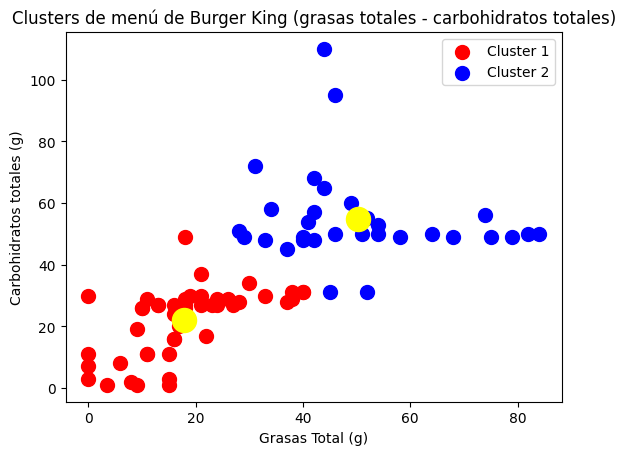

In [48]:
#Visualizando los clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')

#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.scatter(centroides_originales[:, 0], centroides_originales[:, 1], s=300, c='yellow', label = 'Centros')
plt.title('Clusters de menú de Burger King (grasas totales - carbohidratos totales)')
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

In [49]:
rCluster1 = data[data['cluster'] == 0]
rCluster1.head(1)

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
7,Whopper JR.® Sandwich,Burgers,310.0,160.0,18.0,5.0,0.5,40.0,390.0,27.0,1.0,7.0,13.0,309.0,0


In [50]:
rCluster2 = data[data['cluster'] == 1]
rCluster2.head(1)

,Item,Category,Calories,Fat Calories,Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers,cluster
0,Whopper® Sandwich,Burgers,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49.0,2.0,11.0,28.0,655.0,1


### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [51]:
silhouette_score(X_std, y_kmeans)

0.5292698207237178

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [52]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, y_kmeans)

0.6861412675645467

## **DBSCAN**

In [238]:
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN().fit(X_std)  # Ajusta el modelo DBSCAN a los datos representados en X_std
labels = clustering.labels_  # Obtiene las etiquetas asignadas a cada punto por el algoritmo DBSCAN

# Imprime las etiquetas de los clústeres asignadas a cada punto
print(labels)

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  0,  0,  1,  0,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1])

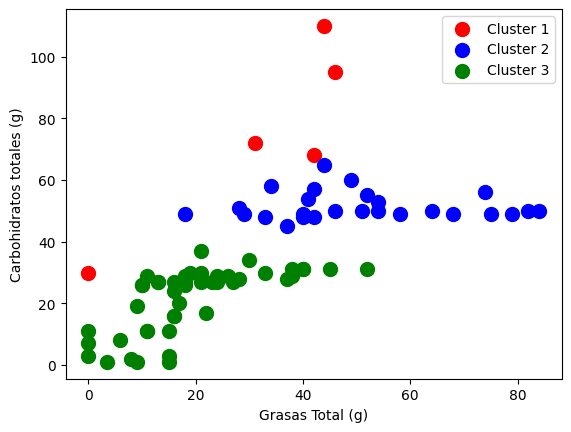

In [239]:
#Visualizando los clusters
plt.scatter(X[labels==-1, 0], X[labels==-1, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='green', label ='Cluster 3')


#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [240]:
silhouette_score(X_std, labels)

0.4653539616416159

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [241]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, labels)

1.1864415000593997

## **Agglomerative Clustering**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [215]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Se realiza el agrupamiento jerárquico con AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_std)  
# Ajusta el modelo de agrupamiento jerárquico a los datos representados en X_std

# Imprime el objeto clustering
print(clustering)

AgglomerativeClustering()

In [216]:
labels1=clustering.labels_
labels1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

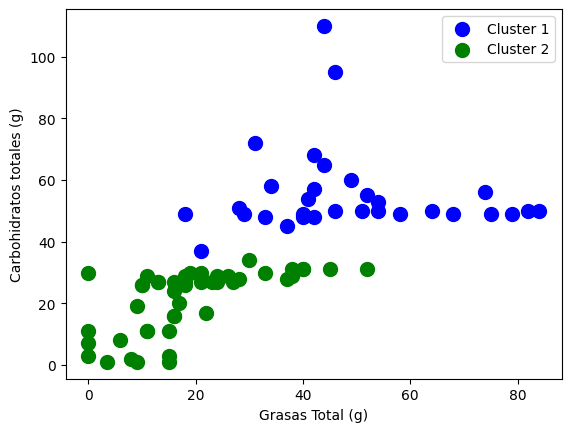

In [218]:
#Visualizando los clusters
plt.scatter(X[labels1==0, 0], X[labels1==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X[labels1==1, 0], X[labels1==1, 1], s=100, c='green', label ='Cluster 2')


#Traza el centroide. Esta vez vamos a utilizar los centros de cluster.
#atributo que devuelve aquí las coordenadas del centroide.
plt.legend()
plt.xlabel('Grasas Total (g)')
plt.ylabel('Carbohidratos totales (g)')
plt.show()

### **Métrica Silhouette Score**
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Calcule el coeficiente de silueta medio de todas las muestras.

In [219]:
silhouette_score(X_std, labels1)

0.5013492135531722

### **Métrica  Davies-Bouldin Index**

Es una métrica de validación que se utiliza para evaluar modelos de agrupación.

https://www.geeksforgeeks.org/davies-bouldin-index/

In [220]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_std, labels1)

0.7290251752161105